# *Ahmed Alhaddad*
# *DS 2000-2001*

# -------------------------------------------------
# Recommeding a Movie Based Solely on the Plot
### Only American Movies 2000-2017
# ------------------------------------------------- 

# *Recommend a Movie*: 

##### first method:

In [ ]:
# Enter the name of the movie between the () in ""
recommend1("")

##### second method:

In [ ]:
# Enter the name of the movie between the () in ""
recommend2("")

##### examples of recommended movies:

In [50]:
recommend1("Gravity"), recommend2("Gravity")

(('Life', 'https://en.wikipedia.org/wiki/Life_(2017_film)'),
 ('Life', 'https://en.wikipedia.org/wiki/Life_(2017_film)'))

In [51]:
recommend1("The Fast and the Furious: Tokyo Drift"), recommend2("The Fast and the Furious: Tokyo Drift")

(('Herbie: Fully Loaded',
  'https://en.wikipedia.org/wiki/Herbie:_Fully_Loaded'),
 ('Driven', 'https://en.wikipedia.org/wiki/Driven_(2001_film)'))

In [33]:
recommend1("Godzilla"), recommend2("Godzilla")

((' G-Force', 'https://en.wikipedia.org/wiki/G-Force_(film)'),
 ('Pitch Black', 'https://en.wikipedia.org/wiki/Pitch_Black_(film)'))

In [34]:
recommend1("Interstellar"), recommend2("Interstellar")

(('Knight and Day', 'https://en.wikipedia.org/wiki/Knight_and_Day'),
 ('Robotech: The Shadow Chronicles',
  'https://en.wikipedia.org/wiki/Robotech:_The_Shadow_Chronicles'))

In [35]:
recommend1("End of Watch"), recommend2("End of Watch")

(('CHiPs', 'https://en.wikipedia.org/wiki/CHiPs_(film)'),
 ('Training Day', 'https://en.wikipedia.org/wiki/Training_Day'))

# *Libraries*:

In [40]:
import csv
import pandas as pd
import string
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maske\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maske\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
from nltk.corpus import names 
# importing text files from the library
male_names = names.words('male.txt')
male_names = [x.lower() for x in male_names]
female_names = names.words('female.txt')
female_names = [x.lower() for x in female_names]

# *Functions*: 
#### Removing Stopwords + Names

In [7]:
# setting up unwanted words (Stopwords + Names)
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
unwanted_words = set(i).union(j).union(male_names).union(female_names)

# function to remove stop words
def preprocessing(text):
    
    # tokenize into words
    tokens = [word for sentence in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sentence)]   
    
    # lower capitalization
    tokens = [word.lower() for word in tokens]
    
    # remove stopwords
    tokens = [token for token in tokens if token not in unwanted_words]
    
    preprocessed_text= ' '.join(tokens)

    return preprocessed_text

#### Lemmatization

In [8]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,"N": wordnet.NOUN,"V": wordnet.VERB,"R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [9]:
def lem(text): 
    return " ".join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(text)])

#### Word Count Dictionary

In [10]:
def word_count(text):
    """ Count occurrences of each word
    Return list of distinct words and corresponding list
    of counts for each word """
    words = {}
    common = {}

    for word in text.split():
        if word in words:
            words[word] += 1
        else:
            words[word] = 1

    for word, occurrence in words.items(): 
        if occurrence > 2 and len(word) > 2: 
            common.update({word:occurrence})
            
            
    return common

In [11]:
def count(text,dic): 
    number = 0
    for word in text.split(): 
        if word in dic: 
            number += 1
    return number

In [12]:
def count2(dic1,dic2): 
    number = 0
    for word in dic1: 
        if word in dic2: 
            number +=1
    return number

#### Outputting a Similar Movie

In [13]:
def recommend1(choice): 
    
    choice = finalized_data.loc[finalized_data['Title']==choice].index[0]
    user_dict = finalized_data["Word Count"][choice]
    
    most_similar = finalized_data['Title'][13677]
    most = count(most_similar,user_dict)
    
    for ind in finalized_data.index:
        if ind == choice: 
            continue
        number = count(finalized_data['Plot3'][ind],user_dict)
        if number > most: 
            most = number 
            most_similar = finalized_data['Title'][ind]
            
    wiki = finalized_data['Wiki Page'][finalized_data.loc[finalized_data['Title']==most_similar].index[0]]
    return most_similar, wiki

In [14]:
def recommend2(choice):
    
    choice = finalized_data.loc[data['Title']==choice].index[0]
    user_dict = finalized_data["Word Count"][choice]
    
    most_similar = finalized_data['Title'][13677]
    most = count2(user_dict,finalized_data['Word Count'][13677])
    
    for ind in finalized_data.index:
        if ind == choice: 
            continue
        number = count2(user_dict,finalized_data["Word Count"][ind])
        if number > most: 
            most = number
            most_similar = finalized_data['Title'][ind]
    
    wiki = finalized_data['Wiki Page'][finalized_data.loc[finalized_data['Title']==most_similar].index[0]]
    return most_similar, wiki

# *Working with CSV*:

In [15]:
# importing the movie plot csv file
file = pd.read_csv('plot.csv')
# selecting certain columns only
data = file[['Release Year', 'Title','Plot','Wiki Page']]

In [16]:
# The size of dataset
data.shape

(17377, 4)

In [17]:
# A subset of American movies 2000-2017
data = data.tail(3700)
data

,Release Year,Title,Plot,Wiki Page
13677,2000,The Legend of Bagger Vance,As an old man having his sixth heart attack wh...,https://en.wikipedia.org/wiki/The_Legend_of_Ba...
13678,2000,Little Nicky,The story revolves around a struggle to determ...,https://en.wikipedia.org/wiki/Little_Nicky
13679,2000,The Little Vampire,9-year-old Tony Thompson (Jonathan Lipnicki) m...,https://en.wikipedia.org/wiki/The_Little_Vampi...
13680,2000,Loser,"Paul Tannek (Jason Biggs), a small-town, intel...",https://en.wikipedia.org/wiki/Loser_(film)
13681,2000,Lost Souls,A small group of fervent Roman Catholics belie...,https://en.wikipedia.org/wiki/Lost_Souls_(film)
13682,2000,Love & Basketball,Monica (Sanaa Lathan) and Quincy (Omar Epps) h...,https://en.wikipedia.org/wiki/Love_%26_Basketball
13683,2000,Lucky Numbers,"In 1988 Russ Richards (John Travolta), the wea...",https://en.wikipedia.org/wiki/Lucky_Numbers
13684,2000,"Me, Myself & Irene",Charlie Baileygates (Jim Carrey) is a veteran ...,"https://en.wikipedia.org/wiki/Me,_Myself_%26_I..."
13685,2000,Meet the Parents,"Gaylord ""Greg"" Focker (Ben Stiller) is a male ...",https://en.wikipedia.org/wiki/Meet_the_Parents
13686,2000,Memento,The film starts with the Polaroid photograph o...,https://en.wikipedia.org/wiki/Memento_(film)


In [18]:
# Adding a movie plot column removing all stopwords and names
data["Plot2"] = data["Plot"].apply(preprocessing)
data2 = data
data2

,Release Year,Title,Plot,Wiki Page,Plot2
13677,2000,The Legend of Bagger Vance,As an old man having his sixth heart attack wh...,https://en.wikipedia.org/wiki/The_Legend_of_Ba...,old man sixth heart attack playing golf hardy ...
13678,2000,Little Nicky,The story revolves around a struggle to determ...,https://en.wikipedia.org/wiki/Little_Nicky,story revolves around struggle determine satan...
13679,2000,The Little Vampire,9-year-old Tony Thompson (Jonathan Lipnicki) m...,https://en.wikipedia.org/wiki/The_Little_Vampi...,9-year-old thompson lipnicki moves family scot...
13680,2000,Loser,"Paul Tannek (Jason Biggs), a small-town, intel...",https://en.wikipedia.org/wiki/Loser_(film),tannek biggs small-town intelligent kid upstat...
13681,2000,Lost Souls,A small group of fervent Roman Catholics belie...,https://en.wikipedia.org/wiki/Lost_Souls_(film),small group fervent catholics believe satan in...
13682,2000,Love & Basketball,Monica (Sanaa Lathan) and Quincy (Omar Epps) h...,https://en.wikipedia.org/wiki/Love_%26_Basketball,sanaa lathan epps wanted professional basketba...
13683,2000,Lucky Numbers,"In 1988 Russ Richards (John Travolta), the wea...",https://en.wikipedia.org/wiki/Lucky_Numbers,1988 richards travolta weatherman harrisburg p...
13684,2000,"Me, Myself & Irene",Charlie Baileygates (Jim Carrey) is a veteran ...,"https://en.wikipedia.org/wiki/Me,_Myself_%26_I...",baileygates carrey veteran rhode island state ...
13685,2000,Meet the Parents,"Gaylord ""Greg"" Focker (Ben Stiller) is a male ...",https://en.wikipedia.org/wiki/Meet_the_Parents,gaylord `` '' focker stiller male nurse living...
13686,2000,Memento,The film starts with the Polaroid photograph o...,https://en.wikipedia.org/wiki/Memento_(film),film starts polaroid photograph dead man seque...


In [19]:
# Adding a new lemmatized plot column
data2["Plot3"] = [lem(x) for x in data2['Plot2']]
data3 = data2

In [20]:
data3

,Release Year,Title,Plot,Wiki Page,Plot2,Plot3
13677,2000,The Legend of Bagger Vance,As an old man having his sixth heart attack wh...,https://en.wikipedia.org/wiki/The_Legend_of_Ba...,old man sixth heart attack playing golf hardy ...,old man sixth heart attack play golf hardy gre...
13678,2000,Little Nicky,The story revolves around a struggle to determ...,https://en.wikipedia.org/wiki/Little_Nicky,story revolves around struggle determine satan...,story revolves around struggle determine satan...
13679,2000,The Little Vampire,9-year-old Tony Thompson (Jonathan Lipnicki) m...,https://en.wikipedia.org/wiki/The_Little_Vampi...,9-year-old thompson lipnicki moves family scot...,9-year-old thompson lipnicki move family scotl...
13680,2000,Loser,"Paul Tannek (Jason Biggs), a small-town, intel...",https://en.wikipedia.org/wiki/Loser_(film),tannek biggs small-town intelligent kid upstat...,tannek biggs small-town intelligent kid upstat...
13681,2000,Lost Souls,A small group of fervent Roman Catholics belie...,https://en.wikipedia.org/wiki/Lost_Souls_(film),small group fervent catholics believe satan in...,small group fervent catholic believe satan int...
13682,2000,Love & Basketball,Monica (Sanaa Lathan) and Quincy (Omar Epps) h...,https://en.wikipedia.org/wiki/Love_%26_Basketball,sanaa lathan epps wanted professional basketba...,sanaa lathan epps want professional basketball...
13683,2000,Lucky Numbers,"In 1988 Russ Richards (John Travolta), the wea...",https://en.wikipedia.org/wiki/Lucky_Numbers,1988 richards travolta weatherman harrisburg p...,1988 richards travolta weatherman harrisburg p...
13684,2000,"Me, Myself & Irene",Charlie Baileygates (Jim Carrey) is a veteran ...,"https://en.wikipedia.org/wiki/Me,_Myself_%26_I...",baileygates carrey veteran rhode island state ...,baileygates carrey veteran rhode island state ...
13685,2000,Meet the Parents,"Gaylord ""Greg"" Focker (Ben Stiller) is a male ...",https://en.wikipedia.org/wiki/Meet_the_Parents,gaylord `` '' focker stiller male nurse living...,gaylord `` `` focker stiller male nurse living...
13686,2000,Memento,The film starts with the Polaroid photograph o...,https://en.wikipedia.org/wiki/Memento_(film),film starts polaroid photograph dead man seque...,film start polaroid photograph dead man sequen...


In [21]:
# Adding the word count dictionary as a new column
data3["Word Count"] = [word_count(x) for x in data3['Plot3']]
finalized_data = data3

# Remvoing certain films from the finalized subset
# These movies were stopping the code from running properly
finalized_data = finalized_data.drop([15941,13682,13754])

finalized_data

,Release Year,Title,Plot,Wiki Page,Plot2,Plot3,Word Count
13677,2000,The Legend of Bagger Vance,As an old man having his sixth heart attack wh...,https://en.wikipedia.org/wiki/The_Legend_of_Ba...,old man sixth heart attack playing golf hardy ...,old man sixth heart attack play golf hardy gre...,"{'play': 7, 'golf': 4, 'greave': 5, 'game': 3,..."
13678,2000,Little Nicky,The story revolves around a struggle to determ...,https://en.wikipedia.org/wiki/Little_Nicky,story revolves around struggle determine satan...,story revolves around struggle determine satan...,"{'satan': 4, 'father': 6, 'hell': 9, 'cassius'..."
13679,2000,The Little Vampire,9-year-old Tony Thompson (Jonathan Lipnicki) m...,https://en.wikipedia.org/wiki/The_Little_Vampi...,9-year-old thompson lipnicki moves family scot...,9-year-old thompson lipnicki move family scotl...,"{'family': 8, 'take': 3, 'lord': 5, 'mcashton'..."
13680,2000,Loser,"Paul Tannek (Jason Biggs), a small-town, intel...",https://en.wikipedia.org/wiki/Loser_(film),tannek biggs small-town intelligent kid upstat...,tannek biggs small-town intelligent kid upstat...,"{'new': 3, 'scholarship': 3, 'try': 4, 'hospit..."
13681,2000,Lost Souls,A small group of fervent Roman Catholics belie...,https://en.wikipedia.org/wiki/Lost_Souls_(film),small group fervent catholics believe satan in...,small group fervent catholic believe satan int...,"{'group': 3, 'kelson': 3}"
13683,2000,Lucky Numbers,"In 1988 Russ Richards (John Travolta), the wea...",https://en.wikipedia.org/wiki/Lucky_Numbers,1988 richards travolta weatherman harrisburg p...,1988 richards travolta weatherman harrisburg p...,"{'snowmobile': 4, 'ticket': 6, 'get': 3, 'try'..."
13684,2000,"Me, Myself & Irene",Charlie Baileygates (Jim Carrey) is a veteran ...,"https://en.wikipedia.org/wiki/Me,_Myself_%26_I...",baileygates carrey veteran rhode island state ...,baileygates carrey veteran rhode island state ...,"{'rhode': 5, 'island': 5, 'state': 3, 'police'..."
13685,2000,Meet the Parents,"Gaylord ""Greg"" Focker (Ben Stiller) is a male ...",https://en.wikipedia.org/wiki/Meet_the_Parents,gaylord `` '' focker stiller male nurse living...,gaylord `` `` focker stiller male nurse living...,"{'propose': 3, 'byrnes': 8, 'wedding': 4, 'fam..."
13686,2000,Memento,The film starts with the Polaroid photograph o...,https://en.wikipedia.org/wiki/Memento_(film),film starts polaroid photograph dead man seque...,film start polaroid photograph dead man sequen...,"{'polaroid': 3, 'photograph': 4, 'man': 3, 'se..."
13687,2000,Men of Honor,Carl Brashear leaves his native Kentucky and t...,https://en.wikipedia.org/wiki/Men_of_Honor,brashear leaves native kentucky life sharecrop...,brashear leaf native kentucky life sharecroppe...,"{'brashear': 15, 'life': 3, 'navy': 7, 'salvag..."


In [22]:
# First and last 5 word count dictionaries
finalized_data['Word Count'].tail(), finalized_data['Word Count'].head()

(17372    {'business': 4, 'leonides': 16, 'private': 3, ...
 17373    {'family': 8, 'attack': 4, 'comanche': 3, 'gro...
 17374    {'getty': 14, 'kidnapper': 5, 'million': 3, 'c...
 17375    {'year': 4, 'decides': 4, 'take': 3, 'move': 3...
 17376    {'dress': 3, 'house': 3, 'first': 3, 'work': 3...
 Name: Word Count, dtype: object,
 13677    {'play': 7, 'golf': 4, 'greave': 5, 'game': 3,...
 13678    {'satan': 4, 'father': 6, 'hell': 9, 'cassius'...
 13679    {'family': 8, 'take': 3, 'lord': 5, 'mcashton'...
 13680    {'new': 3, 'scholarship': 3, 'try': 4, 'hospit...
 13681                            {'group': 3, 'kelson': 3}
 Name: Word Count, dtype: object)

# *Testing:*

#### Obtaining the row number of a movie:

In [48]:
choice = data.loc[data['Title']=="Driven"].index[0]
choice

13836

#### The word count dictionary of a certain movie:

In [49]:
dictionary = word_count(finalized_data["Plot3"][13836])
dictionary

{'car': 9,
 'driver': 3,
 'bly': 5,
 'race': 11,
 'demille': 3,
 'champion': 3,
 'leader': 3,
 'brandenburg': 15,
 'drive': 3,
 'come': 5,
 'mentor': 3,
 'replace': 3,
 'teammate': 3,
 'memo': 8,
 'moreno': 4,
 'close': 3,
 "n't": 3,
 'pit': 3,
 'take': 4,
 'result': 3,
 'crash': 4,
 'back': 3,
 'one': 3,
 'new': 4,
 'decides': 3,
 'get': 3,
 'championship': 4,
 'rescue': 3,
 'final': 3}

#### Number of total words and unwanted words (stopwords + names) in each movie:

In [25]:
# Getting stop words count in movie plots

data['stopwords'] = data['Plot'].apply(lambda x: len([x for x in x.split(" ") if x in unwanted_words]))
data[['Plot','stopwords']].tail()

,Plot,stopwords
17372,The granddaughter of late business tycoon Aris...,462
17373,"In 1892, settler Wesley Quaid and his family a...",267
17374,"In 1973, 16-year-old John Paul Getty III (Paul...",290
17375,Molly Bloom is world-class mogul skier with Ol...,308
17376,"In 1954 London, renowned fashion designer Reyn...",259


In [26]:
data['totalwords'] = data['Plot'].apply(lambda x: len(x.split()))
data[['Plot','totalwords']].tail()

,Plot,totalwords
17372,The granddaughter of late business tycoon Aris...,1045
17373,"In 1892, settler Wesley Quaid and his family a...",665
17374,"In 1973, 16-year-old John Paul Getty III (Paul...",673
17375,Molly Bloom is world-class mogul skier with Ol...,771
17376,"In 1954 London, renowned fashion designer Reyn...",584


#### Comparing *Plot vs Plot 2 vs Plot 3*:

In [45]:
# Original Plot

test = finalized_data["Plot"][14669]
test

'Maggie Peyton (Lohan) is an aspiring race car driver. Maggie\'s family includes her brother, Ray Jr., and her father, Ray Sr., who are members of their namesake\'s racing team. Herbie, a Volkswagen Beetle, is towed to a junkyard after losing several races, and Ray Sr. takes Maggie to the junkyard to buy her a car as a college graduation present. After Maggie selects Herbie, she finds an anonymous note in Herbie\'s glove box, possibly written by Herbie\'s old owner Jim Douglas (Herbie\'s original owner from The Love Bug (1968) and Herbie Goes to Monte Carlo) which reads: "Please take care of Herbie. Whatever your problem, he\'ll help you find the answer". Herbie takes her against her will to the garage where her old friend Kevin works as a mechanic. Kevin has Maggie take Herbie to a car show to buy parts for Herbie, but when they arrive, Herbie tricks Maggie into disguising herself in a racing suit and helmet and challenging NASCAR champion Trip Murphy to an impromptu race, which Herbi

In [46]:
# Plot 2, without stopwrods and names

test2 = preprocessing(test)
test2

"lohan aspiring race car driver 's family includes brother jr. father sr. members namesake 's racing team volkswagen beetle towed junkyard losing several races sr. takes junkyard buy car college graduation present selects finds anonymous note 's glove box possibly written 's old owner 's original owner bug 1968 goes reads `` please take care whatever problem 'll help find answer '' takes garage old friend works mechanic take car show buy parts arrive tricks disguising racing suit helmet challenging nascar champion impromptu race wins second delights tries talk racing however sr. forbidden racing since hospitalized street racing accident years ago concerned also infuriates becomes obsessed organizes local street-racing competition lure back rematch enter easily defeats cars qualifies final match talks racing pinks winner takes possession opponent 's car becomes alarmed 's desire 's stock car addition deeply hurt 's earlier assertion driving tripâ€™s car best ride life incorrectly assume

In [47]:
# Plot 3, lemmatized

test3 = lem(test2)
test3

"lohan aspire race car driver 's family include brother jr. father sr. member namesake 's race team volkswagen beetle towed junkyard lose several race sr. take junkyard buy car college graduation present selects find anonymous note 's glove box possibly write 's old owner 's original owner bug 1968 go read `` please take care whatever problem 'll help find answer `` take garage old friend work mechanic take car show buy part arrive trick disguise race suit helmet challenge nascar champion impromptu race win second delight try talk race however sr. forbidden race since hospitalize street race accident year ago concerned also infuriates becomes obsess organizes local street-racing competition lure back rematch enter easily defeat car qualifies final match talk race pink winner take possession opponent 's car becomes alarmed 's desire 's stock car addition deeply hurt 's earlier assertion drive tripâ€™s car best ride life incorrectly assumes reject win car also unaware agree match could s

# Visuals:
#### Generating a wordcloud with the most mentioned words during a certain number of years

In [30]:
# Install a pip package in the current Jupyter kernel

import sys
!{sys.executable} -m pip install wordcloud

### Lemmatized Movie Plots 2000-2017:

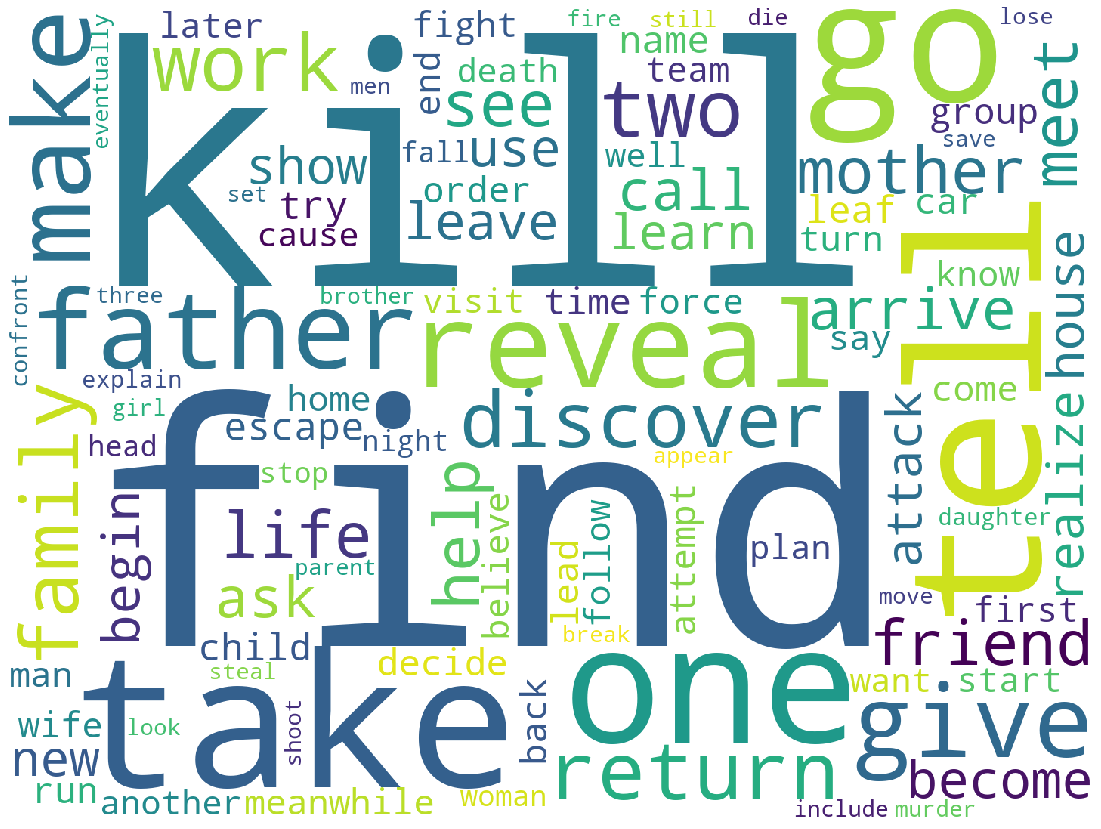

In [39]:
#Word cloud
#sudo pip install wordcloud

from wordcloud import WordCloud,STOPWORDS

cloud = WordCloud(width=1440, height= 1080,max_words= 100,background_color="white").generate(' '.join(data['Plot3'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off');

### Lemmatized Movies 1940-1949:

C:\Users\maske\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


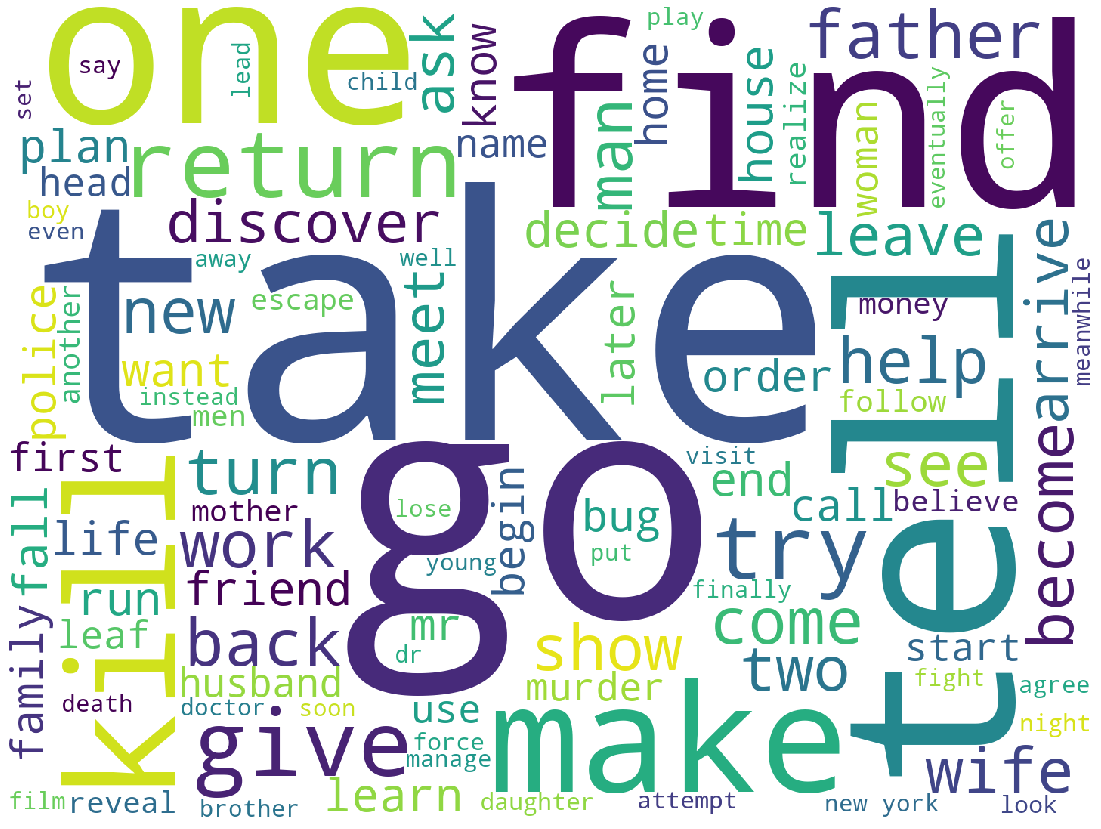

In [40]:
testcase = file[['Release Year', 'Title','Plot']]
fortys = testcase[2725:5038]
fortys["Plot3"] = [lem(preprocessing(x)) for x in fortys["Plot"]]


from wordcloud import WordCloud,STOPWORDS

cloud = WordCloud(width=1440, height= 1080,max_words= 100,background_color="white").generate(' '.join(fortys['Plot3'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off');

### Lemmatized Movies 1940-1949:

C:\Users\maske\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


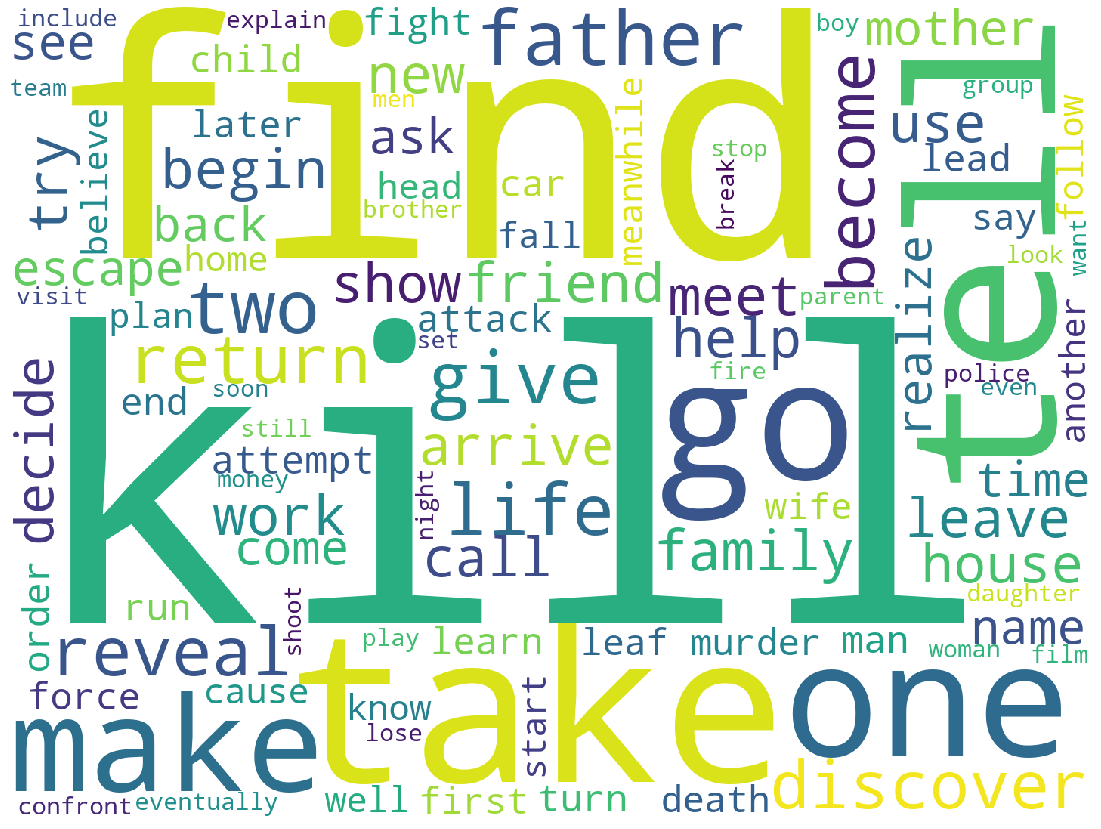

In [41]:
nineties = testcase[11339:13593]
nineties ["Plot3"] = [lem(preprocessing(x)) for x in nineties["Plot"]]


from wordcloud import WordCloud,STOPWORDS

cloud = WordCloud(width=1440, height= 1080,max_words= 100,background_color="white").generate(' '.join(nineties['Plot3'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off');

### Orginial Movie Plots 1900-2017:

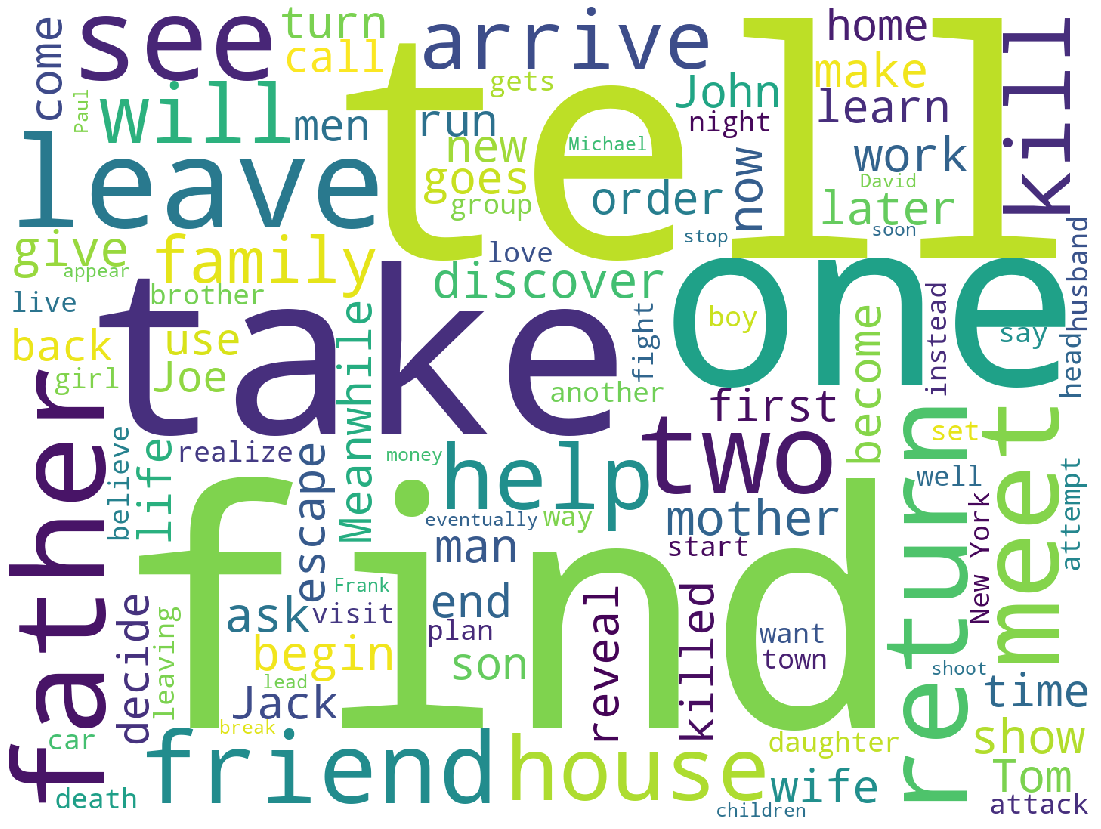

In [42]:
from wordcloud import WordCloud,STOPWORDS

cloud = WordCloud(width=1440, height= 1080,max_words= 100,background_color="white").generate(' '.join(testcase['Plot'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off');

# *Further Improvements* : 

### - Remove neutral verbs (i.e: find, take, go, start...)
### - Incorporate other movie plots datasets or other recommendation engines